Dataset shape: (1797, 64)
Unique labels: [0 1 2 3 4 5 6 7 8 9]

📌 Logistic Regression Accuracy (Before PCA): 0.9814814814814815
📌 SVM Accuracy (Before PCA): 0.9833333333333333

✅ PCA reduced dimensions: 39
📌 Logistic Regression Accuracy (After PCA): 0.9629629629629629
📌 SVM Accuracy (After PCA): 0.9833333333333333


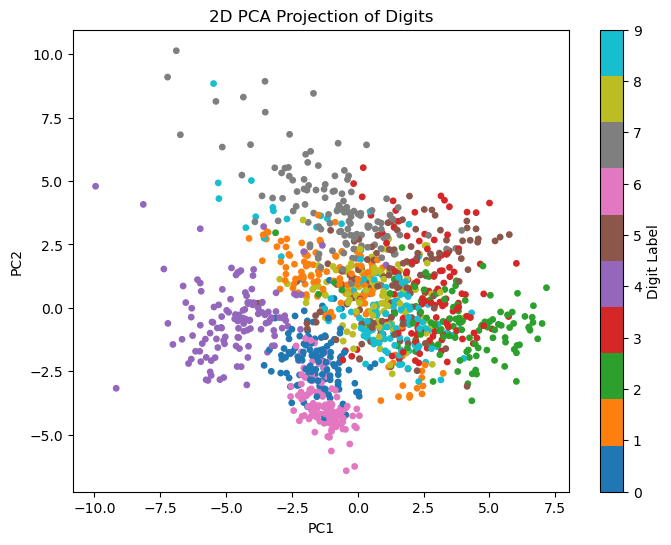

In [43]:
# Step 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 2: Load dataset
digits = load_digits()
X = digits.data      # shape (1797, 64)
y = digits.target    # labels (0–9)

print("Dataset shape:", X.shape)
print("Unique labels:", np.unique(y))

# Step 3: Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Step 4: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5a: Train Logistic Regression (before PCA)
log_reg = LogisticRegression(max_iter=5000)
log_reg.fit(X_train_scaled, y_train)
y_pred1 = log_reg.predict(X_test_scaled)
acc1 = accuracy_score(y_test, y_pred1)
print("\n📌 Logistic Regression Accuracy (Before PCA):", acc1)

# Step 5b: Train SVM (before PCA)
svm = SVC()
svm.fit(X_train_scaled, y_train)
y_pred2 = svm.predict(X_test_scaled)
acc2 = accuracy_score(y_test, y_pred2)
print("📌 SVM Accuracy (Before PCA):", acc2)

# Step 6: Apply PCA (retain 95% variance)
pca = PCA(0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("\n✅ PCA reduced dimensions:", X_train_pca.shape[1])

# Step 7a: Train Logistic Regression (after PCA)
log_reg_pca = LogisticRegression(max_iter=5000)
log_reg_pca.fit(X_train_pca, y_train)
y_pred3 = log_reg_pca.predict(X_test_pca)
acc3 = accuracy_score(y_test, y_pred3)
print("📌 Logistic Regression Accuracy (After PCA):", acc3)

# Step 7b: Train SVM (after PCA)
svm_pca = SVC()
svm_pca.fit(X_train_pca, y_train)
y_pred4 = svm_pca.predict(X_test_pca)
acc4 = accuracy_score(y_test, y_pred4)
print("📌 SVM Accuracy (After PCA):", acc4)

# Step 8: Visualize 2D PCA projection
pca2d = PCA(n_components=2)
X_pca2d = pca2d.fit_transform(X_train_scaled)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca2d[:,0], X_pca2d[:,1], c=y_train, cmap='tab10', s=15)
plt.colorbar(scatter, label="Digit Label")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("2D PCA Projection of Digits")
plt.show()


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()


df = pd.DataFrame(digits.data, columns=digits.feature_names) 
df["target"] = digits.target


In [45]:
df.isnull().sum() 


pixel_0_0    0
pixel_0_1    0
pixel_0_2    0
pixel_0_3    0
pixel_0_4    0
            ..
pixel_7_4    0
pixel_7_5    0
pixel_7_6    0
pixel_7_7    0
target       0
Length: 65, dtype: int64

In [46]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [47]:
print(df.columns)
print(df.shape)

Index(['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4',
       'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1',
       'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6',
       'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3',
       'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0',
       'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5',
       'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2',
       'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7',
       'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4',
       'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1',
       'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6',
       'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3',
       'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7', 'target'],
      dtype='object')
(1797, 65)


In [48]:

sum=0
for i in df.skew(): 
    if((i>1.5) or (i<-1)):
        print(i)
        sum+=1
print(sum)

4.004889145630366
-1.2446732583940652
-1.1355327936227209
2.850641160612328
9.927679686862936
18.481247841485878
1.7191775274145593
2.245838621381367
9.538616656815936
25.14018140393825
2.2339888177426395
10.873585814891324
29.949930372410314
1.5393515019671569
21.14233509701741
20.21539886740942
2.403074716627257
14.611190026422104
35.29815470177782
3.7346981923427194
6.382821783396587
42.3910367884533
4.5607143770528635
-1.3389767446469116
-1.2104560573593286
2.1787780976411644
6.076762039144469
27


In [49]:
X = df.drop("target", axis=1)  
y = df["target"]

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.decomposition import PCA

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

pt = PowerTransformer(method="yeo-johnson")
X_train_pt = pt.fit_transform(X_train)
X_test_pt  = pt.transform(X_test)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_pt)
X_test_scaled  = scaler.transform(X_test_pt)


pca = PCA(n_components=0.95)  
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)

In [65]:
print("X_train_pca shape:", X_train_pca.shape)
print("X_test_pca shape:", X_test_pca.shape)


X_train_pca shape: (1257, 39)
X_test_pca shape: (540, 39)


In [64]:
print("Number of PCA components:", pca.n_components_)


Number of PCA components: 39


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


log_reg = LogisticRegression(max_iter=5000)
log_reg.fit(X_train_scaled, y_train)


y_pred = log_reg.predict(X_test_scaled)


print( accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9629629629629629
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       0.93      0.96      0.95        55
           2       0.95      0.98      0.96        53
           3       0.96      1.00      0.98        55
           4       0.95      0.98      0.96        54
           5       1.00      0.96      0.98        55
           6       1.00      0.98      0.99        54
           7       0.96      0.98      0.97        54
           8       0.90      0.88      0.89        52
           9       0.98      0.91      0.94        54

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540



In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


log_reg = LogisticRegression(max_iter=5000)
log_reg.fit(X_train_pca, y_train)


y_pred = log_reg.predict(X_test_pca)


print( accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.9518518518518518
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       0.89      0.91      0.90        55
           2       0.94      0.96      0.95        53
           3       0.98      0.98      0.98        55
           4       0.95      0.98      0.96        54
           5       1.00      0.96      0.98        55
           6       1.00      0.98      0.99        54
           7       0.96      0.98      0.97        54
           8       0.85      0.87      0.86        52
           9       0.94      0.91      0.92        54

    accuracy                           0.95       540
   macro avg       0.95      0.95      0.95       540
weighted avg       0.95      0.95      0.95       540



In [59]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train_scaled, y_train)


y_pred_svm = svm.predict(X_test_scaled)


print( accuracy_score(y_test, y_pred_svm))

0.9629629629629629


In [60]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train_pca, y_train)


y_pred_svm = svm.predict(X_test_pca)


print( accuracy_score(y_test, y_pred_svm))


0.9611111111111111


In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)


print( accuracy_score(y_test, y_pred_rf))
print( classification_report(y_test, y_pred_rf))

0.9685185185185186
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        54
           1       0.93      1.00      0.96        55
           2       1.00      1.00      1.00        53
           3       0.96      0.96      0.96        55
           4       0.96      1.00      0.98        54
           5       1.00      0.98      0.99        55
           6       1.00      0.98      0.99        54
           7       0.93      1.00      0.96        54
           8       0.94      0.87      0.90        52
           9       0.96      0.93      0.94        54

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_pca, y_train)


y_pred_rf = rf.predict(X_test_pca)


print( accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

0.95
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       0.90      0.96      0.93        55
           2       0.95      0.98      0.96        53
           3       0.98      0.93      0.95        55
           4       0.95      0.96      0.95        54
           5       0.95      0.95      0.95        55
           6       1.00      0.98      0.99        54
           7       0.96      1.00      0.98        54
           8       0.91      0.81      0.86        52
           9       0.91      0.94      0.93        54

    accuracy                           0.95       540
   macro avg       0.95      0.95      0.95       540
weighted avg       0.95      0.95      0.95       540



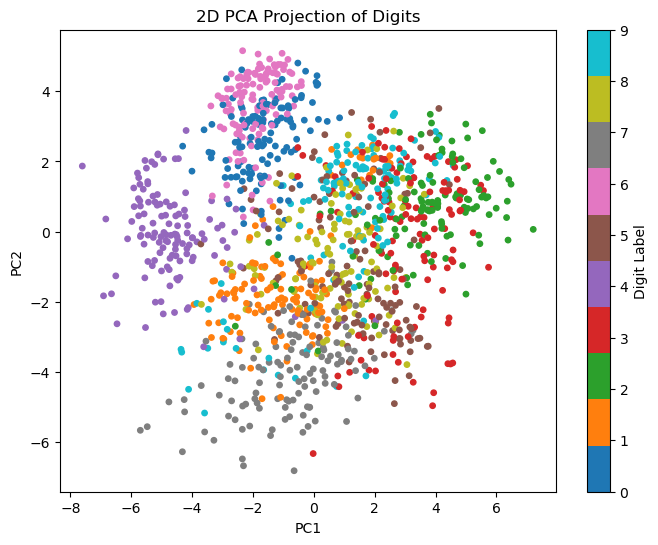

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train, cmap='tab10', s=15)
plt.colorbar(scatter, label="Digit Label")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("2D PCA Projection of Digits")
plt.show()

In [68]:
import numpy as np


X_all_pca = np.vstack([X_train_pca, X_test_pca])
y_all = np.hstack([y_train, y_test])


df_pca = pd.DataFrame(X_all_pca)
df_pca["target"] = y_all


df_pca.to_csv("digits_full_after_pca.csv", index=False)




In [69]:
df1=pd.read_csv("digits_full_after_pca.csv")
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,target
0,-2.830661,1.798930,0.607104,0.130350,0.991603,-0.307497,0.069380,1.019042,-0.172491,-1.497662,...,-1.190867,-1.620643,0.278072,1.887696,-0.906783,0.032000,-0.024254,-0.046033,0.288670,0
1,-0.498008,-3.001213,-0.350761,-0.726556,0.671274,-0.964100,-1.530452,-1.618564,1.323277,0.252359,...,0.103577,-1.346508,-0.724385,-0.227657,-0.396003,-0.245944,-0.724862,-0.090027,0.272368,7
2,-1.527827,-1.663946,1.477300,3.022974,-0.106683,2.424240,-0.953293,2.621753,-0.769345,-0.641526,...,-0.540040,-0.118887,-0.175067,-0.801812,-0.278213,-0.180058,-0.219454,0.519607,0.473270,1
3,2.226655,-0.619753,-0.201506,2.485334,0.303658,0.892060,0.069665,0.083584,1.461795,-0.532051,...,-0.358604,0.524256,-0.126761,-0.684296,0.554546,0.195865,-0.084781,0.750674,1.104933,3
4,-1.198486,3.152464,-2.900782,-1.294020,0.969573,-1.983615,-0.169283,1.695713,0.075359,-0.575066,...,-0.233104,0.377173,0.298335,-0.886677,0.518512,0.767872,-0.171849,-0.428017,0.294013,0


In [71]:
sample = X_test.iloc[0].values.reshape(1, -1)

prediction = rf.predict(sample)

print("Predicted digit:", prediction[0])
print("Actual digit:", y_test.iloc[0])


Predicted digit: 1
Actual digit: 1
